In [2]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tqdm import tqdm

In [3]:
!pip install kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [00:49<00:00, 126MB/s]
100% 3.75G/3.75G [00:49<00:00, 81.2MB/s]


In [8]:
! unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [9]:
def build_model(pretrained):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

    return model

In [10]:
base_path = '/content/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.


In [11]:
image_gen1 = ImageDataGenerator(rescale=1./255.)

valid_flow = image_gen1.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [12]:
densenet = ResNet50(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(densenet)

In [14]:
train_steps = 100000//64
valid_steps = 20000//64

history = model.fit(
    train_flow,
    epochs = 10,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1023s 607ms/step - accuracy: 0.7070 - loss: 0.5972 - val_accuracy: 0.5678 - val_loss: 4.0115
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 14:51 571ms/step - accuracy: 0.9219 - loss: 0.2339

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - loss: 0.2339 - val_accuracy: 0.6250 - val_loss: 3.5860
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 913s 584ms/step - accuracy: 0.9046 - loss: 0.2354 - val_accuracy: 0.8427 - val_loss: 0.3659
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 72us/step - accuracy: 0.9531 - loss: 0.1266 - val_accuracy: 0.7812 - val_loss: 0.5676
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 920s 583ms/step - accuracy: 0.9503 - loss: 0.1303 - val_accuracy: 0.8589 - val_loss: 0.3588
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 71us/step - accuracy: 0.9375 - loss: 0.1184 - val_accuracy: 0.7812 - val_loss: 0.3949
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 912s 583ms/step - accuracy: 0.9699 - loss: 0.0811 - val_accuracy: 0.9352 - val_loss: 0.1694
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 68us/step - accuracy: 0.9688 - loss: 0.1170 - val_accuracy: 1.0000 - val_loss: 0.0168
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 920s 582ms/step - accuracy: 0.9763 - loss: 0

In [15]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [16]:
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

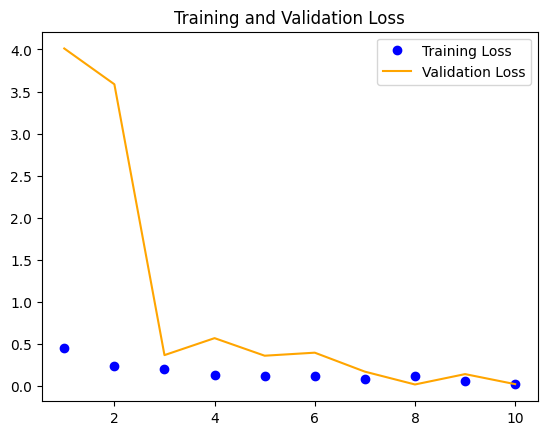

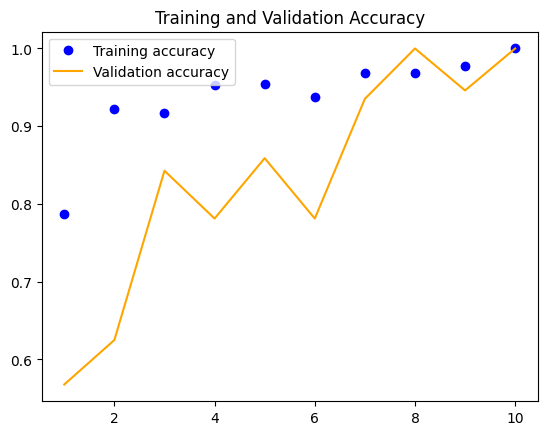

In [18]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [19]:
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)
y_pred = model.predict(test_flow)
y_test = test_flow.classes

Found 20000 images belonging to 2 classes.
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 156s 8ms/step


In [20]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.988496535
AP Score: 0.9877445361896355

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10000
           1       0.95      0.95      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000

